## Feature Engineering work

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 100)

In [2]:
## Reading the data set
train = pd.read_csv('/Users/gabrielvictorgomesferreira/Desktop/Diabetes_Project/Data/diabetes_train.csv')

## Printing the first five observations
train.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     0.0       1.0        1.0  30.0     1.0     0.0                   0.0   
1     1.0       1.0        1.0  30.0     1.0     0.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  24.0     0.0     1.0                   0.0   
4     0.0       0.0        1.0  35.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0           0.0     1.0      1.0                0.0            1.0   
1           1.0     0.0      1.0                0.0            1.0   
2           1.0     1.0      1.0                0.0            1.0   
3           0.0     1.0      1.0                0.0            1.0   
4           0.0     0.0      1.0                0.0            0.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      2.0      30.0       5.0       0.0  0.0   6.0        6.0   
1          0.0      2.0       0.0       0.0       0.0  1.0  11.0        4.0   
2          0.0      2.0       0.0       0.0       0.0  1.0   8.0        6.0   
3          0.0      3.0       0.0       4.0       0.0  1.0   7.0        5.0   
4          1.0      4.0       0.0       0.0       0.0  1.0   7.0        4.0   

   Income  Diabetes_012  
0     8.0           2.0  
1     7.0           0.0  
2     7.0           0.0  
3     7.0           0.0  
4     1.0           0.0

### Exploration

(array([4.4000e+02, 1.0285e+04, 4.6890e+04, 7.4995e+04, 3.7079e+04,
        1.7135e+04, 9.5840e+03, 3.2640e+03, 1.5350e+03, 6.5500e+02,
        3.8800e+02, 1.4000e+02, 5.6000e+01, 8.3000e+01, 9.3000e+01,
        1.0200e+02, 1.0300e+02, 7.4000e+01, 2.7000e+01, 1.6000e+01]),
 array([12. , 16.3, 20.6, 24.9, 29.2, 33.5, 37.8, 42.1, 46.4, 50.7, 55. ,
        59.3, 63.6, 67.9, 72.2, 76.5, 80.8, 85.1, 89.4, 93.7, 98. ]),
 <a list of 20 Patch objects>)

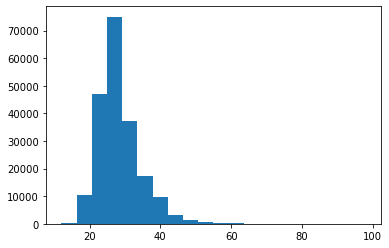

In [3]:
plt.hist(train['BMI'], bins = 20)

(array([36163., 71428., 60421., 25341.,  9591.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

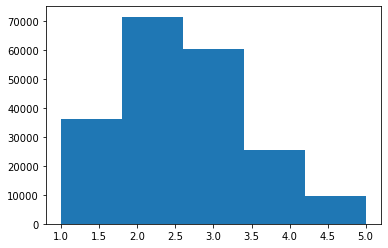

In [4]:
plt.hist(train['GenHlth'], bins = 5)

(array([1.40549e+05, 6.78300e+03, 1.03740e+04, 5.91900e+03, 3.03900e+03,
        7.28200e+03, 7.82000e+02, 2.46100e+03, 5.28000e+02, 6.80000e+01,
        5.06600e+03, 3.20000e+01, 3.10000e+02, 3.30000e+01, 9.38000e+02,
        4.39600e+03, 7.20000e+01, 4.70000e+01, 8.00000e+01, 1.40000e+01,
        2.72600e+03, 1.79000e+02, 5.00000e+01, 3.00000e+01, 2.30000e+01,
        9.72000e+02, 3.30000e+01, 6.60000e+01, 2.67000e+02, 9.82500e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

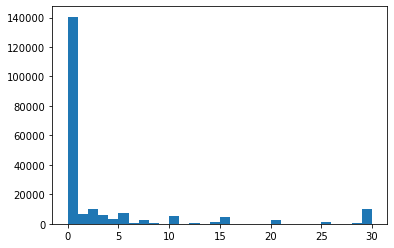

In [5]:
plt.hist(train['MentHlth'], bins = 30)

(array([1.28074e+05, 9.07900e+03, 1.18530e+04, 6.80800e+03, 3.64500e+03,
        6.08300e+03, 1.07100e+03, 3.61400e+03, 6.58000e+02, 1.38000e+02,
        4.50800e+03, 4.50000e+01, 4.70000e+02, 5.20000e+01, 2.05400e+03,
        3.92900e+03, 8.60000e+01, 7.90000e+01, 1.23000e+02, 1.70000e+01,
        2.61900e+03, 5.17000e+02, 5.70000e+01, 4.30000e+01, 5.50000e+01,
        1.05700e+03, 5.60000e+01, 8.80000e+01, 4.16000e+02, 1.56500e+04]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

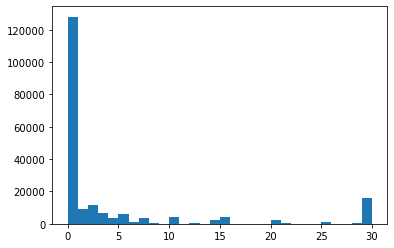

In [6]:
plt.hist(train['PhysHlth'], bins = 30)

(array([10583.,  8936., 24014., 15827., 45675., 26579., 44592., 26738.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. ]),
 <a list of 8 Patch objects>)

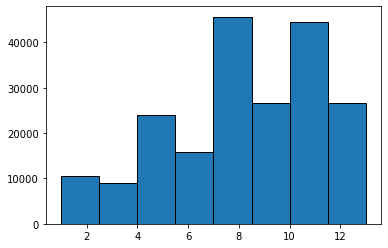

In [7]:
plt.hist(train['Age'], bins = 8, edgecolor = 'black')

(array([  133.,  3200.,  7627., 50248., 55870., 85866.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

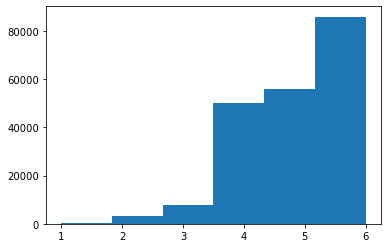

In [8]:
plt.hist(train['Education'], bins = 6)

(array([ 7821.,  9388., 12852., 16019., 20651., 29254., 34526., 72433.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

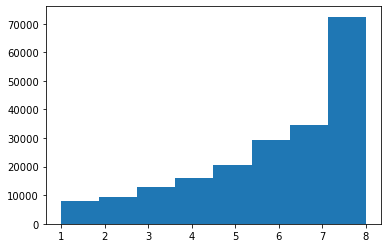

In [9]:
plt.hist(train['Income'], bins = 8)

### Feature Engineering

In [12]:
## BMI Categoricals

train['BMI_Underweight'] = np.where(train['BMI'] < 18.5, 1, 0)
train['BMI_Healthy'] = np.where((train['BMI'] >= 18.5) & (train['BMI'] < 25), 1, 0)
train['BMI_Overweight'] = np.where((train['BMI'] >= 25) & (train['BMI'] < 30), 1, 0)
train['BMI_Obese'] = np.where(train['BMI'] >= 30, 1, 0)


## Log(BMI)
train['Log_BMI'] = np.log(train['BMI'])


## Creating dummy variables for Sex, Education, and Income

train = pd.get_dummies(train['Sex'])
train = train.rename(columns = { 0: 'Female', 1: 'Male'})

train = pd.concat([train.drop(columns = ['Education']), pd.get_dummies(train['Education'])], axis = 1)
train = train.rename(columns = { 1: 'Never_Attended', 2: 'Grades_1_8', 3: 'Grades_9_11', 4: 'GED', 5: 'College_1_3', 
                              6: 'College_4+'})

train = pd.concat([train.drop(columns = ['Income']), pd.get_dummies(train['Income'])], axis = 1)
train = train.rename(columns = { 1: '<10,000', 2: '<15,000', 3: '<20,000', 4: '<25,000', 5: '<35,000', 
                                      6: '<50,000',  7: '<75,000',  8: '75,000+'})


## Fruits and Veggies
train['Fruits+Veggies'] = np.where((train['Fruits'] == 1) & (train['Veggies'] == 1), 1, 0)

## Health care issues
train['HealthCareIssues'] = np.where((train['AnyHealthcare'] == 0) & (train['NoDocbcCost'] == 0), 1, 0)

## Poor diet
train['PoorDiet'] = np.where((train['Fruits'] == 0) & (train['Veggies'] == 0) & 
                                (train['HvyAlcoholConsump'] == 1), 1, 0)


train['MentHlth_cat'] = np.where((train.MentHlth <=10), 0, 
                                 np.where((train.MentHlth > 10) & (train.MentHlth <= 20), 1, 2))

train['PhysHlth_cat'] = np.where((train.PhysHlth <=10), 0, 
                              np.where((train.PhysHlth > 10) & (train.PhysHlth <= 20), 1, 2))

train['GenHlth_cat'] = np.where((train.GenHlth <=2), 0, 
                             np.where((train.GenHlth > 3) & (train.GenHlth <= 5), 1, 2))

KeyError: "['Education'] not found in axis"

In [5]:
## Calculating variable importance scores

## Defining the input and target variables
X = train.drop(columns = ['Diabetes_012'])
Y = train['Diabetes_012']

## Defining a list to store results
results = []

## Repeating process 100 times
for i in tqdm(range(0, 25)):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## Building the model
    OneVsRest_md = OneVsRestClassifier(estimator = RandomForestClassifier(max_depth = 3, 
                                                                   n_estimators = 500)).fit(X_train, Y_train)
    
    ## Appending feature importance results
    for md in OneVsRest_md.estimators_:
        
        ## Extracting the scores from each model
        results.append(md.feature_importances_)

    

## Changing results list to a dataframe
results = pd.DataFrame(results, columns = X.columns)

## Computing averages and sorting variables by importance
results = pd.DataFrame(results.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values}).sort_values(by = 'Importance', ascending = False)

## Printing the 10 most important variables
results.head(10)

100%|██████████| 25/25 [24:22<00:00, 58.51s/it]


Feature  Importance
0                 HighBP    0.164299
13               GenHlth    0.141154
44           GenHlth_cat    0.136300
1               HighChol    0.090789
22               Log_BMI    0.078797
3                    BMI    0.077984
16              DiffWalk    0.063898
21             BMI_Obese    0.059546
17                   Age    0.045350
6   HeartDiseaseorAttack    0.025912

In [6]:
## Creating interactions

train['Interaction_1'] = train['HighBP'] * train['GenHlth']

train['Interaction_2'] = train['HighBP'] * train['GenHlth_cat']

train['Interaction_3'] = train['HighBP'] * train['HighChol']

train['Interaction_4'] = train['GenHlth'] * train['GenHlth_cat']

train['Interaction_5'] = train['GenHlth'] * train['HighChol']

train['Interaction_6'] = train['GenHlth_cat'] * train['HighChol']

[Text(558.0, 951.3000000000001, 'Interaction_2 <= 0.5\ngini = 0.271\nsamples = 142060\nvalue = [119673, 2593, 19794]'),
 Text(279.0, 679.5, 'Interaction_5 <= 1.5\ngini = 0.162\nsamples = 104161\nvalue = [95041, 1410, 7710]'),
 Text(139.5, 407.70000000000005, 'Age <= 8.5\ngini = 0.113\nsamples = 74848\nvalue = [70395, 713, 3740]'),
 Text(69.75, 135.89999999999998, 'gini = 0.068\nsamples = 47429\nvalue = [45771, 304, 1354]'),
 Text(209.25, 135.89999999999998, 'gini = 0.186\nsamples = 27419\nvalue = [24624, 409, 2386]'),
 Text(418.5, 407.70000000000005, 'Log_BMI <= 3.384\ngini = 0.274\nsamples = 29313\nvalue = [24646, 697, 3970]'),
 Text(348.75, 135.89999999999998, 'gini = 0.216\nsamples = 19071\nvalue = [16771, 371, 1929]'),
 Text(488.25, 135.89999999999998, 'gini = 0.368\nsamples = 10242\nvalue = [7875, 326, 2041]'),
 Text(837.0, 679.5, 'Interaction_5 <= 3.5\ngini = 0.475\nsamples = 37899\nvalue = [24632, 1183, 12084]'),
 Text(697.5, 407.70000000000005, 'BMI <= 30.5\ngini = 0.43\nsample

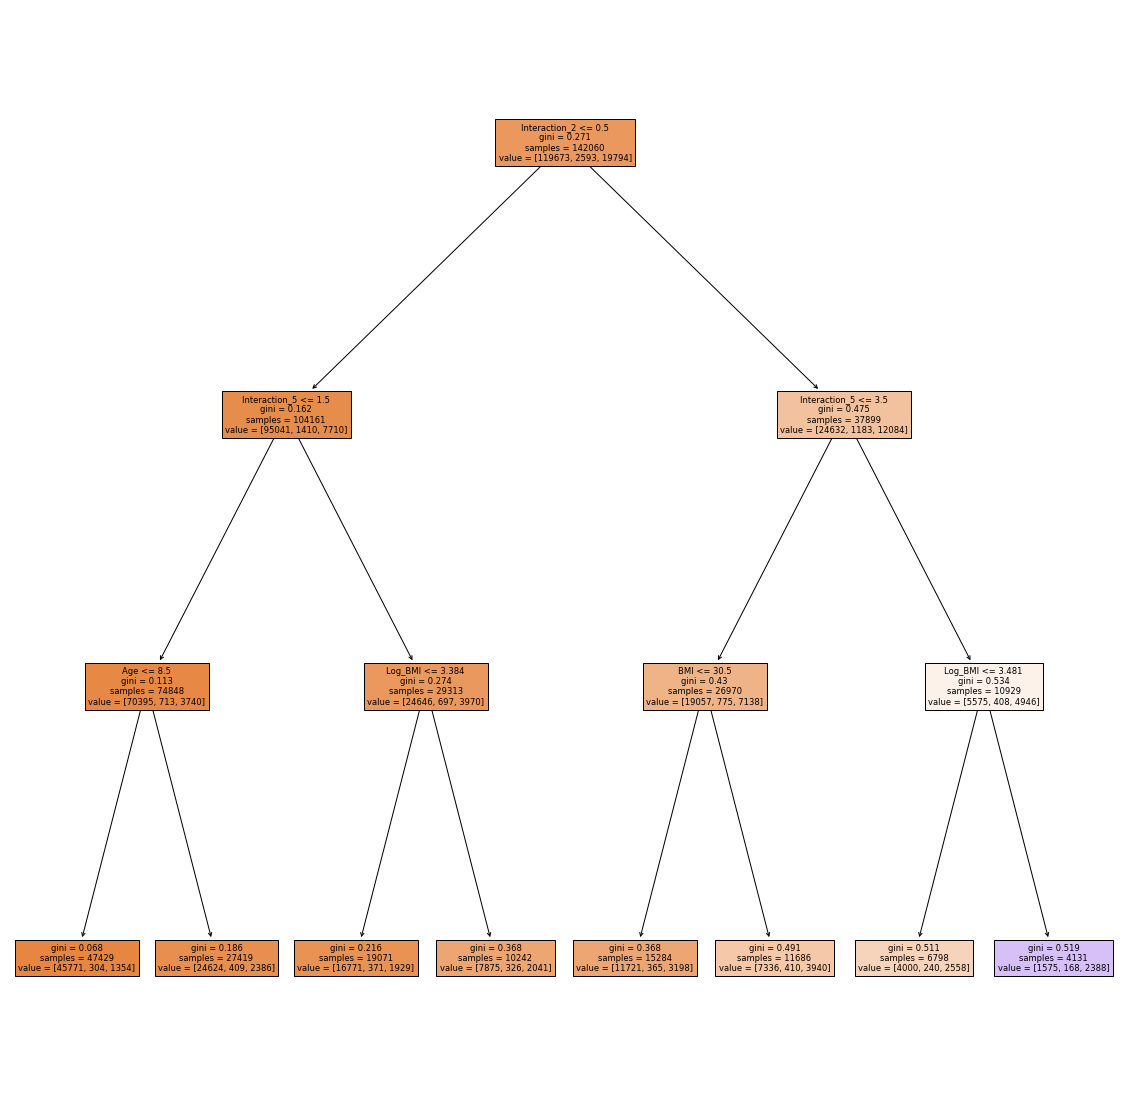

In [8]:
## Creating a plot tree to engineer more interactions

## Defining the input and target variables
X = train.drop(columns = ['Diabetes_012'])
Y = train['Diabetes_012']

## Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

## Building a decision tree model with max depth = 3 on the train data-frame
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

## Visualizing the decision tree model and identify any interesting interactions/features
fig = plt.figure(figsize = (20, 20))
plot_tree(tree_md, feature_names = X.columns, filled = True)

In [9]:
## Creating tree interactions

train['Tree_1'] = np.where((train['Interaction_2'] <= 0.5) & (train['Interaction_5'] <= 1.5) & (train['Age'] <= 8.5), 1, 0)

train['Tree_2'] = np.where((train['Interaction_2'] <= 0.5) & (train['Interaction_5'] <= 1.5) & (train['Age'] > 8.5), 1, 0)

train['Tree_3'] = np.where((train['Interaction_2'] <= 0.5) & (train['Interaction_5'] > 1.5) & (train['Log_BMI'] <= 3.384), 1, 0)

train['Tree_4'] = np.where((train['Interaction_2'] <= 0.5) & (train['Interaction_5'] > 1.5) & (train['Log_BMI'] > 3.384), 1, 0)

train['Tree_5'] = np.where((train['Interaction_2'] > 0.5) & (train['Interaction_5'] <= 3.5) & (train['BMI'] <= 30.5), 1, 0)

train['Tree_6'] = np.where((train['Interaction_2'] > 0.5) & (train['Interaction_5'] <= 3.5) & (train['BMI'] > 30.5), 1, 0)

train['Tree_7'] = np.where((train['Interaction_2'] > 0.5) & (train['Interaction_5'] > 3.5) & (train['Log_BMI'] <= 3.481), 1, 0)

train['Tree_8'] = np.where((train['Interaction_2'] > 0.5) & (train['Interaction_5'] > 3.5) & (train['Log_BMI'] > 3.481), 1, 0)

In [10]:
train.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     0.0       1.0        1.0  30.0     1.0     0.0                   0.0   
1     1.0       1.0        1.0  30.0     1.0     0.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  24.0     0.0     1.0                   0.0   
4     0.0       0.0        1.0  35.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0           0.0     1.0      1.0                0.0            1.0   
1           1.0     0.0      1.0                0.0            1.0   
2           1.0     1.0      1.0                0.0            1.0   
3           0.0     1.0      1.0                0.0            1.0   
4           0.0     0.0      1.0                0.0            0.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk   Age  Diabetes_012  \
0          0.0      2.0      30.0       5.0       0.0   6.0           2.0   
1          0.0      2.0       0.0       0.0       0.0  11.0           0.0   
2          0.0      2.0       0.0       0.0       0.0   8.0           0.0   
3          0.0      3.0       0.0       4.0       0.0   7.0           0.0   
4          1.0      4.0       0.0       0.0       0.0   7.0           0.0   

   BMI_Underweight  BMI_Healthy  BMI_Overweight  BMI_Obese   Log_BMI  Female  \
0                0            0               0          1  3.401197       1   
1                0            0               0          1  3.401197       0   
2                0            0               1          0  3.258097       0   
3                0            1               0          0  3.178054       0   
4                0            0               0          1  3.555348       0   

   Male  Grades_1_8  2.0  Grades_9_11  GED  College_1_3  College_4+  <15,000  \
0     0           0    0            0    0            0           1        0   
1     1           0    0            0    1            0           0        0   
2     1           0    0            0    0            0           1        0   
3     1           0    0            0    0            1           0        0   
4     1           0    0            0    1            0           0        1   

   2.0  <20,000  <25,000  <35,000  75,000+  <75,000  8.0  Fruits+Veggies  \
0    0        0        0        0        0        0    1               1   
1    0        0        0        0        0        1    0               0   
2    0        0        0        0        0        1    0               1   
3    0        0        0        0        0        1    0               1   
4    0        0        0        0        0        0    0               0   

   HealthCareIssues  PoorDiet  MentHlth_cat  PhysHlth_cat  GenHlth_cat  \
0                 0         0             2             0            0   
1                 0         0             0             0            0   
2                 0         0             0             0            0   
3                 0         0             0             0            2   
4                 0         0             0             0            1   

   Interaction_1  Interaction_2  Interaction_3  Interaction_4  Interaction_5  \
0            0.0            0.0            0.0            0.0            2.0   
1            2.0            0.0            1.0            0.0            2.0   
2            0.0            0.0            0.0            0.0            0.0   
3            3.0            2.0            1.0            6.0            3.0   
4            0.0            0.0            0.0            4.0            0.0   

   Interaction_6  Tree_1  Tree_2  Tree_3  Tree_4  Tree_5  Tree_6  Tree_7  \
0            0.0       0       0       0       1       0       0       0   
1            0.0       0       0       0       1       0       0       0   
2            0.0       1       0       0       0       0       0       0   
3

In [11]:
train.shape

(202944, 60)